# Observer

Observer é utilizado como um padrão de comportamento que quando ocorre um evento notifica todas as classes cadastrada na quele evento

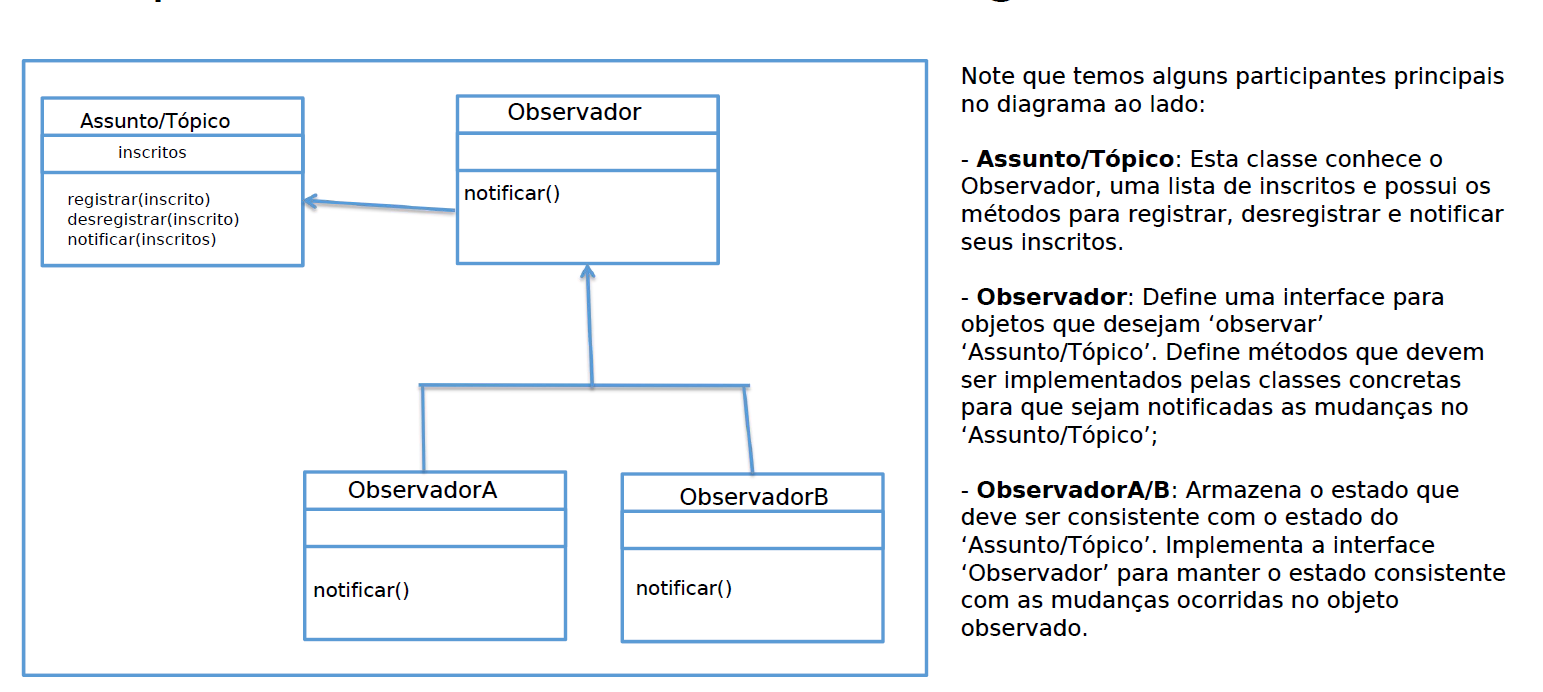

In [1]:
from abc import ABCMeta, abstractmethod

In [212]:
class MotherShard():
    
    def __init__(self, name):
        self._name = name 
        self.__subscribed = []
        self.__post = []
    
    def get_name(self):
        return self._name
        
    def subscribe(self, perfil):
        self.__subscribed.append(perfil)
        return True
    
    def unsubscribe(self, perfil):
        index = self.__subscribed.index(perfil)
        self.__subscribed.remove(index)
        return True
    
    def notification(self):
        for sub in self.__subscribed:
            sub.notify(self._name)
        return True
    
    def added_post(self, post):
        self.__post.append(post)
        self.notification()
        return True
    
    def llst_subscribes(self):
        print("users sunscribes in shard:")
        for user in self.__subscribed:
            print(user.name_user)
        
    def last_update(self):
        print(f"Last post in Shard: {self._name}\n\n\
              {self.__post[-1]}\n")
        return True

In [213]:
class Anime(MotherShard):
    
    def __init__(self):
        super().__init__("Anime")


class Polities(MotherShard):
    def __init__(self):
        super().__init__("Polities")

In [214]:
# Observer - Abstrac Class - inteface
class IObserver(metaclass=ABCMeta):
    
    @abstractmethod
    def notify(self):
        pass

In [215]:
class User(IObserver):

    def __init__(self, name):
        self.name_user = name
        self.favorites_shard = {}
    
    def subscribed_shard(self, shard):
        shard.subscribe(self)
        self.favorites_shard[shard.get_name()] = shard
        print(f"{self.name_user}, your subscribe in {shard.get_name()}")
        return True
    
    def list_subcribed():
        print("subscribes: \n")
        for sub, _ in favorites_shard:
            print(sub)
        return None
    
    def notify(self, name_shard):
        if name_shard in self.favorites_shard.keys():
            print(
                f"Notify update in shard {name_shard}")
            self.favorites_shard[name_shard].last_update()
        else:
            print(f"Not subscrive in shard")
        

###### instance for publ

In [216]:
anime = Anime()
polities = Polities()

###### subscribe users

In [217]:
pedro = User("pedroAnt")
marcos = User("Marcosgus")
felipe = User("Fehsx")

In [218]:
marcos.subscribed_shard(anime)
felipe.subscribed_shard(anime)
pedro.subscribed_shard(anime)

Marcosgus, your subscribe in Anime
Fehsx, your subscribe in Anime
pedroAnt, your subscribe in Anime


True

In [219]:
pedro.subscribed_shard(polities)
felipe.subscribed_shard(polities)

pedroAnt, your subscribe in Polities
Fehsx, your subscribe in Polities


True

###### publicator

In [220]:
anime.added_post("this new post of animes shard")

Notify update in shard Anime
Last post in Shard: Anime

              this new post of animes shard

Notify update in shard Anime
Last post in Shard: Anime

              this new post of animes shard

Notify update in shard Anime
Last post in Shard: Anime

              this new post of animes shard



True

In [223]:
anime.llst_subscribes()

users sunscribes in shard:
Marcosgus
Fehsx
pedroAnt


In [224]:
polities.added_post("this new post of polities shard")

Notify update in shard Polities
Last post in Shard: Polities

              this new post of polities shard

Notify update in shard Polities
Last post in Shard: Polities

              this new post of polities shard



True

In [228]:
polities.llst_subscribes()

users sunscribes in shard:
pedroAnt
Fehsx


## vantagens

* Oferece suporte para o princípio do baixo acoplamento entre objetos que interajam uns com
os outros;

* Permite enviar dados a outros objetos de modo eficiente, sem qualquer mudança nas classes
Assunto/Tópico ou Observer;

* Os Observers podem ser adicionados/removidos a qualquer momento;

## desvantagens

* A interface Observer deve ser implementada pelos Observers, o que envolve herança. Não há
opção para usar composição, pois a interface Observer não pode ser instanciada;

* Se não for implementado corretamente, o Observer pode acrescentar complexidade e levar a
problemas imprevistos de desempenho;

* Em uma aplicação de software, às veses, as notificações podem não ser confiáveis e resultar
em condições de concorrência (race conditions) ou inconsistência;